In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import awkward

In [2]:
colorConvert = {12:'black',11:'black',10:'black',9:'black',8:'black',7:'black',6:'black',5:'g',4:'b',3:'purple',2:'pink',1:'red'}

import matplotlib.patches as mpatches
patch6 = mpatches.Patch(color='black', label='# eLink > 5')
patch5 = mpatches.Patch(color='green', label='# eLink = 5')
patch4 = mpatches.Patch(color='blue', label='# eLink = 4')
patch3 = mpatches.Patch(color='purple', label='# eLink = 3')
patch2 = mpatches.Patch(color='pink', label='# eLink = 2')
patch1 = mpatches.Patch(color='red', label='# eLink = 1')



In [9]:
threshold=1.5
layer = 36

nJobs = 20
thrString = ("%.1f"%threshold).replace('.','p')

fill = 50
again = 0

outputName = 'maxLatency_LinksAboveMin_layer%i.pdf'%layer
if fill>0:
    outputName = outputName.replace('.pdf','_filled%i.pdf'%fill)
    if again > 0:
        outputName = outputName.replace('.pdf','_againEvery%i.pdf'%again)

tcCount = []
bitCount = []
latencyTracker = []
OverflowCount = []
ResetCount = []

for i in range(nJobs):
    BufferOutput = "/uscmst1b_scratch/lpc1/3DayLifetime/dnoonan/data/ECON-T_Buffer/Output_Buffer_TTbar200PU_thr%s_layer%i_job%i.pkl"%(thrString,layer,i)
    if fill>0:
        BufferOutput = BufferOutput.replace('_job','_fillEvery%i_job'%fill)
        if again > 0:
            BufferOutput = BufferOutput.replace('_job','_againEvery%i_job'%again)

    print(BufferOutput)
    with open(BufferOutput,'rb') as f:
#         tcCount.append(pickle.load(f))
#         bitCount.append(pickle.load(f))
#         latencyTracker.append(pickle.load(f))
#         OverflowCount.append(pickle.load(f))
#         ResetCount.append(pickle.load(f))
#         wafers = pickle.load(f)
#         meanBits = pickle.load(f)
        tcCount=(pickle.load(f))
        bitCount=(pickle.load(f))
        latencyTracker.append(pickle.load(f))
        OverflowCount.append(pickle.load(f))
        ResetCount.append(pickle.load(f))
        wafers = pickle.load(f)
        meanOcc = pickle.load(f)
        meanBits = pickle.load(f)
    
    
for k in ResetCount[0]:
    for i in range(1,20):
        ResetCount[0][k] += ResetCount[i][k]
        OverflowCount[0][k] += OverflowCount[i][k]
ResetCount = ResetCount[0]
OverflowCount = OverflowCount[0]

keys = OverflowCount.keys()
N = len(latencyTracker[0][1][0])

keys = np.array(list(keys))

/uscmst1b_scratch/lpc1/3DayLifetime/dnoonan/data/ECON-T_Buffer/Output_Buffer_TTbar200PU_thr1p5_layer36_fillEvery50_job0.pkl
/uscmst1b_scratch/lpc1/3DayLifetime/dnoonan/data/ECON-T_Buffer/Output_Buffer_TTbar200PU_thr1p5_layer36_fillEvery50_job1.pkl
/uscmst1b_scratch/lpc1/3DayLifetime/dnoonan/data/ECON-T_Buffer/Output_Buffer_TTbar200PU_thr1p5_layer36_fillEvery50_job2.pkl
/uscmst1b_scratch/lpc1/3DayLifetime/dnoonan/data/ECON-T_Buffer/Output_Buffer_TTbar200PU_thr1p5_layer36_fillEvery50_job3.pkl
/uscmst1b_scratch/lpc1/3DayLifetime/dnoonan/data/ECON-T_Buffer/Output_Buffer_TTbar200PU_thr1p5_layer36_fillEvery50_job4.pkl
/uscmst1b_scratch/lpc1/3DayLifetime/dnoonan/data/ECON-T_Buffer/Output_Buffer_TTbar200PU_thr1p5_layer36_fillEvery50_job5.pkl
/uscmst1b_scratch/lpc1/3DayLifetime/dnoonan/data/ECON-T_Buffer/Output_Buffer_TTbar200PU_thr1p5_layer36_fillEvery50_job6.pkl
/uscmst1b_scratch/lpc1/3DayLifetime/dnoonan/data/ECON-T_Buffer/Output_Buffer_TTbar200PU_thr1p5_layer36_fillEvery50_job7.pkl
/uscmst1

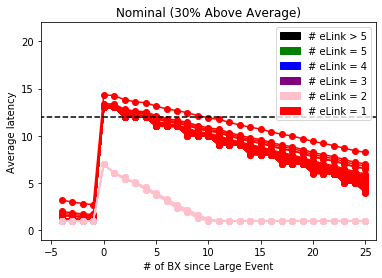

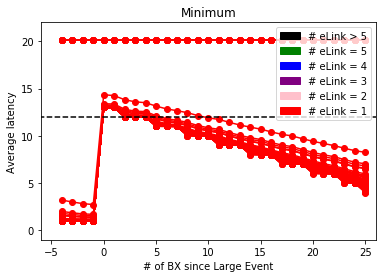

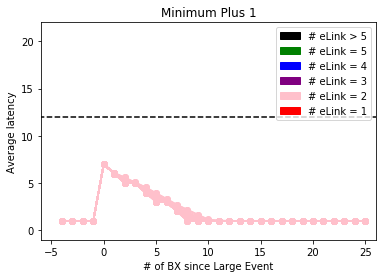

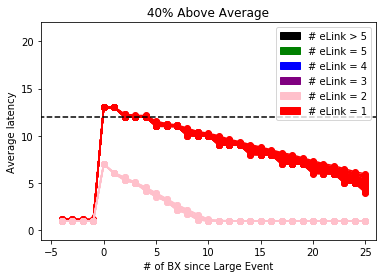

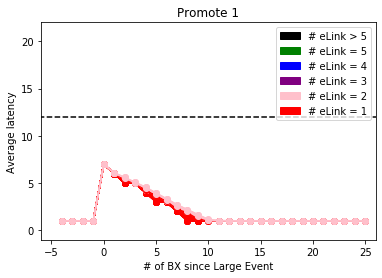

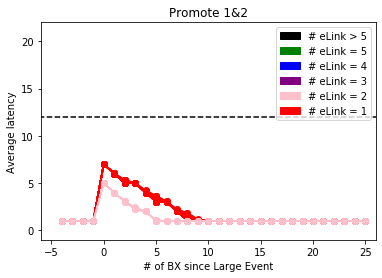

In [10]:
x = range(-4,26)
colorBin = np.digitize(1.3*meanBits,bins=np.linspace(0,384,13))
colorScheme = np.array([colorConvert[x] for x in colorBin])

plt.figure()
for w in range(len(wafers)-1,-1,-1):
    s = np.round(1.3*meanBits[w]/32 + .5)
    y = [np.mean([latencyTracker[k][s][w][i::50].mean() for k in range(nJobs)]) for i in range(45,75)]
    if ResetCount[s][w]>0: y = [20+.1*colorBin[w]]*len(x)
    plt.plot(x,y,'-o',c=colorScheme[w])
#plt.legend(keys[2::2],ncol=1);
#plt.savefig('Layer36_DrainTime_FilledEvery50.pdf',format='pdf')
plt.xlabel('# of BX since Large Event')
plt.ylabel('Average latency')
plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1],loc=1)
plt.title('Nominal (30% Above Average)')
plt.axis([-6,26,-1,22])
plt.plot([-26,26],[12,12],c='black',ls='dashed')
saveName = 'Layer%i_DrainTime_FilledEvery50_MinLinkPlus30Percent.pdf'%layer
if again>0:
    saveName = saveName.replace('FilledEvery50_','FilledEvery50_AgainEvery%i_'%again)
plt.savefig(saveName,format='pdf')


plt.figure()
colorBin = np.digitize(meanBits,bins=np.linspace(0,384,13))
colorScheme = np.array([colorConvert[x] for x in colorBin])

for w in range(len(wafers)-1,-1,-1):
    s = np.round(meanBits[w]/32 + .5)
    y = [np.mean([latencyTracker[k][s][w][i::50].mean() for k in range(nJobs)]) for i in range(45,75)]
    if ResetCount[s][w]>0: y = [20+.1*colorBin[w]]*len(x)
    plt.plot(x,y,'-o',c=colorScheme[w])
#plt.legend(keys[2::2],ncol=1);
#plt.savefig('Layer36_DrainTime_FilledEvery50.pdf',format='pdf')
plt.xlabel('# of BX since Large Event')
plt.ylabel('Average latency')
plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1],loc=1)
plt.title('Minimum')
plt.axis([-6,26,-1,22])
plt.plot([-26,26],[12,12],c='black',ls='dashed')
saveName = 'Layer%i_DrainTime_FilledEvery50_MinLink.pdf'%layer
if again>0:
    saveName = saveName.replace('FilledEvery50_','FilledEvery50_AgainEvery%i_'%again)

plt.savefig(saveName,format='pdf')


plt.figure()
colorBin = np.digitize(meanBits,bins=np.linspace(0,384,13))+1
colorScheme = np.array([colorConvert[x] for x in colorBin])

for w in range(len(wafers)-1,-1,-1):
    s = np.round(meanBits[w]/32 + .5)+1
    y = [np.mean([latencyTracker[k][s][w][i::50].mean() for k in range(nJobs)]) for i in range(45,75)]
    if ResetCount[s][w]>0: y = [20+.1*colorBin[w]]*len(x)
    plt.plot(x,y,'-o',c=colorScheme[w])
#plt.legend(keys[2::2],ncol=1);
#plt.savefig('Layer36_DrainTime_FilledEvery50.pdf',format='pdf')
plt.xlabel('# of BX since Large Event')
plt.ylabel('Average latency')
plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1],loc=1)
plt.title('Minimum Plus 1')
plt.axis([-6,26,-1,22])
plt.plot([-26,26],[12,12],c='black',ls='dashed')
saveName = 'Layer%i_DrainTime_FilledEvery50_MinLinkPlus1.pdf'%layer
if again>0:
    saveName = saveName.replace('FilledEvery50_','FilledEvery50_AgainEvery%i_'%again)
plt.savefig(saveName,format='pdf')

plt.figure()
colorBin = np.digitize(1.4*meanBits,bins=np.linspace(0,384,13))
colorScheme = np.array([colorConvert[x] for x in colorBin])

for w in range(len(wafers)-1,-1,-1):
    s = np.round(1.4*meanBits[w]/32 + .5)
    y = [np.mean([latencyTracker[k][s][w][i::50].mean() for k in range(nJobs)]) for i in range(45,75)]
    if ResetCount[s][w]>0: y = [20+.1*colorBin[w]]*len(x)
    plt.plot(x,y,'-o',c=colorScheme[w])
#plt.legend(keys[2::2],ncol=1);
#plt.savefig('Layer36_DrainTime_FilledEvery50.pdf',format='pdf')
plt.xlabel('# of BX since Large Event')
plt.ylabel('Average latency')
plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1],loc=1)
plt.title('40% Above Average')
plt.axis([-6,26,-1,22])
plt.plot([-26,26],[12,12],c='black',ls='dashed')
saveName = 'Layer%i_DrainTime_FilledEvery50_MinLinkPlus40Percent.pdf'%layer
if again>0:
    saveName = saveName.replace('FilledEvery50_','FilledEvery50_AgainEvery%i_'%again)
plt.savefig(saveName,format='pdf')


plt.figure()
colorBin = np.digitize(1.3*meanBits,bins=np.linspace(0,384,13))
colorScheme = np.array([colorConvert[x] for x in colorBin])

for w in range(len(wafers)-1,-1,-1):
    s = np.round(1.3*meanBits[w]/32 + .5)
    if s==1: s=2
    y = [np.mean([latencyTracker[k][s][w][i::50].mean() for k in range(nJobs)]) for i in range(45,75)]
    if ResetCount[s][w]>0: y = [20+.1*colorBin[w]]*len(x)
    plt.plot(x,y,'-o',c=colorScheme[w])
#plt.legend(keys[2::2],ncol=1);
#plt.savefig('Layer36_DrainTime_FilledEvery50.pdf',format='pdf')
plt.xlabel('# of BX since Large Event')
plt.ylabel('Average latency')
plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1],loc=1)
plt.title('Promote 1')
plt.axis([-6,26,-1,22])
plt.plot([-26,26],[12,12],c='black',ls='dashed')
saveName = 'Layer%i_DrainTime_FilledEvery50_MinLinkPlus30Promote1.pdf'%layer
if again>0:
    saveName = saveName.replace('FilledEvery50_','FilledEvery50_AgainEvery%i_'%again)
plt.savefig(saveName,format='pdf')


plt.figure()
colorBin = np.digitize(1.3*meanBits,bins=np.linspace(0,384,13))
colorScheme = np.array([colorConvert[x] for x in colorBin])

for w in range(len(wafers)-1,-1,-1):
    s = np.round(1.3*meanBits[w]/32 + .5)
    if s==2: s=3
    if s==1: s=2
    y = [np.mean([latencyTracker[k][s][w][i::50].mean() for k in range(nJobs)]) for i in range(45,75)]
    if ResetCount[s][w]>0: y = [20+.1*colorBin[w]]*len(x)
    plt.plot(x,y,'-o',c=colorScheme[w])
#plt.legend(keys[2::2],ncol=1);
#plt.savefig('Layer36_DrainTime_FilledEvery50.pdf',format='pdf')
plt.xlabel('# of BX since Large Event')
plt.ylabel('Average latency')
plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1],loc=1)
plt.title('Promote 1&2')
plt.axis([-6,26,-1,22])
plt.plot([-26,26],[12,12],c='black',ls='dashed')
saveName = 'Layer%i_DrainTime_FilledEvery50_MinLinkPlus30Promote2.pdf'%layer
if again>0:
    saveName = saveName.replace('FilledEvery50_','FilledEvery50_AgainEvery%i_'%again)
plt.savefig(saveName,format='pdf')

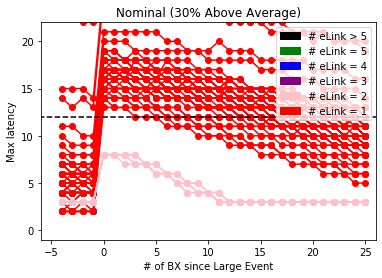

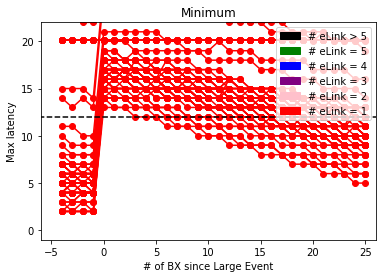

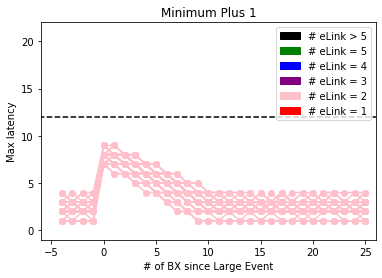

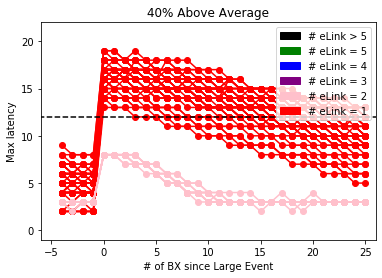

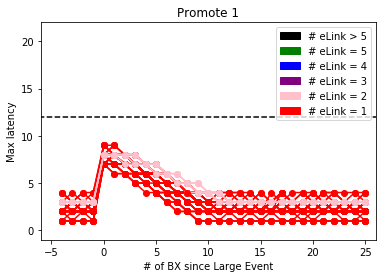

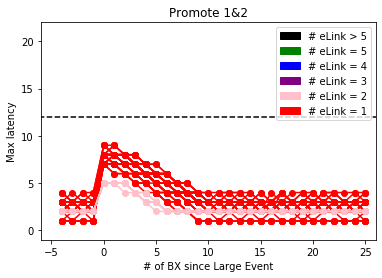

In [11]:
x = range(-4,26)
colorBin = np.digitize(1.3*meanBits,bins=np.linspace(0,384,13))
colorScheme = np.array([colorConvert[x] for x in colorBin])

plt.figure()
for w in range(len(wafers)-1,-1,-1):
    s = np.round(1.3*meanBits[w]/32 + .5)
    y = [np.max([latencyTracker[k][s][w][i::50].max() for k in range(nJobs)]) for i in range(45,75)]
    if ResetCount[s][w]>0: y = [20+.1*colorBin[w]]*len(x)
    plt.plot(x,y,'-o',c=colorScheme[w])
#plt.legend(keys[2::2],ncol=1);
#plt.savefig('Layer36_MaxDrainTime_FilledEvery50.pdf',format='pdf')
plt.xlabel('# of BX since Large Event')
plt.ylabel('Max latency')
plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1],loc=1)
plt.title('Nominal (30% Above Average)')
plt.axis([-6,26,-1,22])
plt.plot([-26,26],[12,12],c='black',ls='dashed')
saveName = 'Layer%i_MaxDrainTime_FilledEvery50_MinLinkPlus30Percent.pdf'%layer
if again>0:
    saveName = saveName.replace('FilledEvery50_','FilledEvery50_AgainEvery%i_'%again)
plt.savefig(saveName,format='pdf')


plt.figure()
colorBin = np.digitize(meanBits,bins=np.linspace(0,384,13))
colorScheme = np.array([colorConvert[x] for x in colorBin])

for w in range(len(wafers)-1,-1,-1):
    s = np.round(meanBits[w]/32 + .5)
    y = [np.max([latencyTracker[k][s][w][i::50].max() for k in range(nJobs)]) for i in range(45,75)]
    if ResetCount[s][w]>0: y = [20+.1*colorBin[w]]*len(x)
    plt.plot(x,y,'-o',c=colorScheme[w])
#plt.legend(keys[2::2],ncol=1);
#plt.savefig('Layer36_MaxDrainTime_FilledEvery50.pdf',format='pdf')
plt.xlabel('# of BX since Large Event')
plt.ylabel('Max latency')
plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1],loc=1)
plt.title('Minimum')
plt.axis([-6,26,-1,22])
plt.plot([-26,26],[12,12],c='black',ls='dashed')
saveName = 'Layer%i_MaxDrainTime_FilledEvery50_MinLink.pdf'%layer
if again>0:
    saveName = saveName.replace('FilledEvery50_','FilledEvery50_AgainEvery%i_'%again)

plt.savefig(saveName,format='pdf')


plt.figure()
colorBin = np.digitize(meanBits,bins=np.linspace(0,384,13))+1
colorScheme = np.array([colorConvert[x] for x in colorBin])

for w in range(len(wafers)-1,-1,-1):
    s = np.round(meanBits[w]/32 + .5)+1
    y = [np.max([latencyTracker[k][s][w][i::50].max() for k in range(nJobs)]) for i in range(45,75)]
    if ResetCount[s][w]>0: y = [20+.1*colorBin[w]]*len(x)
    plt.plot(x,y,'-o',c=colorScheme[w])
#plt.legend(keys[2::2],ncol=1);
#plt.savefig('Layer36_MaxDrainTime_FilledEvery50.pdf',format='pdf')
plt.xlabel('# of BX since Large Event')
plt.ylabel('Max latency')
plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1],loc=1)
plt.title('Minimum Plus 1')
plt.axis([-6,26,-1,22])
plt.plot([-26,26],[12,12],c='black',ls='dashed')
saveName = 'Layer%i_MaxDrainTime_FilledEvery50_MinLinkPlus1.pdf'%layer
if again>0:
    saveName = saveName.replace('FilledEvery50_','FilledEvery50_AgainEvery%i_'%again)
plt.savefig(saveName,format='pdf')

plt.figure()
colorBin = np.digitize(1.4*meanBits,bins=np.linspace(0,384,13))
colorScheme = np.array([colorConvert[x] for x in colorBin])

for w in range(len(wafers)-1,-1,-1):
    s = np.round(1.4*meanBits[w]/32 + .5)
    y = [np.max([latencyTracker[k][s][w][i::50].max() for k in range(nJobs)]) for i in range(45,75)]
    if ResetCount[s][w]>0: y = [20+.1*colorBin[w]]*len(x)
    plt.plot(x,y,'-o',c=colorScheme[w])
#plt.legend(keys[2::2],ncol=1);
#plt.savefig('Layer36_MaxDrainTime_FilledEvery50.pdf',format='pdf')
plt.xlabel('# of BX since Large Event')
plt.ylabel('Max latency')
plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1],loc=1)
plt.title('40% Above Average')
plt.axis([-6,26,-1,22])
plt.plot([-26,26],[12,12],c='black',ls='dashed')
saveName = 'Layer%i_MaxDrainTime_FilledEvery50_MinLinkPlus40Percent.pdf'%layer
if again>0:
    saveName = saveName.replace('FilledEvery50_','FilledEvery50_AgainEvery%i_'%again)
plt.savefig(saveName,format='pdf')


plt.figure()
colorBin = np.digitize(1.3*meanBits,bins=np.linspace(0,384,13))
colorScheme = np.array([colorConvert[x] for x in colorBin])

for w in range(len(wafers)-1,-1,-1):
    s = np.round(1.3*meanBits[w]/32 + .5)
    if s==1: s=2
    y = [np.max([latencyTracker[k][s][w][i::50].max() for k in range(nJobs)]) for i in range(45,75)]
    if ResetCount[s][w]>0: y = [20+.1*colorBin[w]]*len(x)
    plt.plot(x,y,'-o',c=colorScheme[w])
#plt.legend(keys[2::2],ncol=1);
#plt.savefig('Layer36_MaxDrainTime_FilledEvery50.pdf',format='pdf')
plt.xlabel('# of BX since Large Event')
plt.ylabel('Max latency')
plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1],loc=1)
plt.title('Promote 1')
plt.axis([-6,26,-1,22])
plt.plot([-26,26],[12,12],c='black',ls='dashed')
saveName = 'Layer%i_MaxDrainTime_FilledEvery50_MinLinkPlus30Promote1.pdf'%layer
if again>0:
    saveName = saveName.replace('FilledEvery50_','FilledEvery50_AgainEvery%i_'%again)
plt.savefig(saveName,format='pdf')


plt.figure()
colorBin = np.digitize(1.3*meanBits,bins=np.linspace(0,384,13))
colorScheme = np.array([colorConvert[x] for x in colorBin])

for w in range(len(wafers)-1,-1,-1):
    s = np.round(1.3*meanBits[w]/32 + .5)
    if s==2: s=3
    if s==1: s=2
    y = [np.max([latencyTracker[k][s][w][i::50].max() for k in range(nJobs)]) for i in range(45,75)]
    if ResetCount[s][w]>0: y = [20+.1*colorBin[w]]*len(x)
    plt.plot(x,y,'-o',c=colorScheme[w])
#plt.legend(keys[2::2],ncol=1);
#plt.savefig('Layer36_MaxDrainTime_FilledEvery50.pdf',format='pdf')
plt.xlabel('# of BX since Large Event')
plt.ylabel('Max latency')
plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1],loc=1)
plt.title('Promote 1&2')
plt.axis([-6,26,-1,22])
plt.plot([-26,26],[12,12],c='black',ls='dashed')
saveName = 'Layer%i_MaxDrainTime_FilledEvery50_MinLinkPlus30Promote2.pdf'%layer
if again>0:
    saveName = saveName.replace('FilledEvery50_','FilledEvery50_AgainEvery%i_'%again)
plt.savefig(saveName,format='pdf')